# Datenanalyse: Seattle Library Checkouts

In [1]:
# Libraries importieren
import urllib.request
import pandas as pd

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkouts_file = "checkouts.csv"

In [3]:
# Download der Daten
urllib.request.urlretrieve (url, checkouts_file)

('checkouts.csv', <http.client.HTTPMessage at 0x1f3fe409e88>)

In [4]:
#Anzeigen der Tabelle mit Pandas
checkouts = pd.read_csv(checkouts_file)

In [5]:
checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,The naked lady who stood on her head : a psych...,"Small, Gary, 1951-","Small Gary 1951, Psychiatry Popular works, Psy...","William Morrow,",[2010]
1,Physical,Horizon,BOOK,2018,12,1,The night of the iguana / by Tennessee Williams.,"Williams, Tennessee, 1911-1983",NaN,"Dramatists Play Service,",[1991]
2,Physical,Horizon,SOUNDDISC,2018,12,1,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Psychiatrists Fiction, Wealth Moral and ethica...","Naxos AudioBooks,",[2010]
3,Physical,Horizon,BOOK,2018,12,1,Be prepared fishing / Henry Gilbey.,"Gilbey, Henry",Fishing,"DK Pub.,",2008.
4,Physical,Horizon,BOOK,2018,12,1,What Darwin saw : the journey that changed the...,"Schanzer, Rosalyn","Darwin Charles 1809 1882 Juvenile literature, ...","National Geographic,",[2009]
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2018,12,2,My little polar bear / Claudia Rueda.,"Rueda, Claudia","Polar bear Juvenile fiction, Bears Juvenile fi...","Scholastic Press,",2009.
9996,Digital,OverDrive,EBOOK,2018,12,1,"Love Over Scotland: 44 Scotland Street Series,...",Alexander McCall Smith,"Fiction, Humor (Fiction), Mystery","Random House, Inc.",2009
9997,Digital,OverDrive,EBOOK,2018,12,2,The India Fan,Victoria Holt,"Fiction, Historical Fiction, Romance, Suspense",Sourcebooks,2013
9998,Physical,Horizon,VIDEODISC,2018,12,5,"30 Rock. Season 7, the final season / Universa...",NaN,"Rockefeller Center Drama, Television comedy wr...","Universal Studios Home Entertainment,",[2013]


In [6]:
# Anzeigen der Spaltennamen
print(checkouts.columns)

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')


## Wie viele Checkouts gab es insgesamt?

In [7]:
checkouts["checkouts"].sum()

34686

## Welche Medienarten kommen wie häufig vor?

In [8]:
# Gruppieren nach materialtype + Anzahl
checkouts.groupby("materialtype")["materialtype"].count()

materialtype
AUDIOBOOK               1029
BOOK                    4563
CR                         6
EBOOK                   2548
ER                         7
ER, SOUNDDISC              2
LARGEPRINT                 4
MAGAZINE                   6
MIXED                      2
MUSIC                     26
REGPRINT                  18
SOUNDDISC                883
SOUNDDISC, VIDEODISC      13
SOUNDREC                   5
VIDEO                      6
VIDEODISC                882
Name: materialtype, dtype: int64

In [9]:
# Histogramm
# checkouts.groupby("materialtype")["materialtype"].hist()

In [10]:
# Gruppieren und sortieren
checkouts.groupby('materialtype')['materialtype'].size().sort_values(ascending=False)

materialtype
BOOK                    4563
EBOOK                   2548
AUDIOBOOK               1029
SOUNDDISC                883
VIDEODISC                882
MUSIC                     26
REGPRINT                  18
SOUNDDISC, VIDEODISC      13
ER                         7
VIDEO                      6
MAGAZINE                   6
CR                         6
SOUNDREC                   5
LARGEPRINT                 4
MIXED                      2
ER, SOUNDDISC              2
Name: materialtype, dtype: int64

In [11]:
# Library für Pie Chart
import matplotlib.pyplot as plt

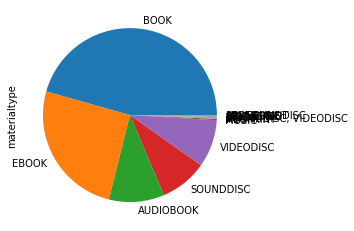

In [12]:
# Pie Chart zeichnen
checkouts.groupby('materialtype')['materialtype'].size().sort_values(ascending=False).plot.pie()

## Welche Medienarten wurden wie häufig ausgeliehen?

In [13]:
# Anzeigen der unter materialtype vorhandenen Kategorien + Summe der Checkouts
checkouts.groupby('materialtype')['checkouts'].sum()

materialtype
AUDIOBOOK                4601
BOOK                    14348
CR                         19
EBOOK                    7754
ER                         10
ER, SOUNDDISC               4
LARGEPRINT                  9
MAGAZINE                  254
MIXED                      18
MUSIC                      30
REGPRINT                   70
SOUNDDISC                1838
SOUNDDISC, VIDEODISC       28
SOUNDREC                    7
VIDEO                       7
VIDEODISC                5689
Name: checkouts, dtype: int64

In [14]:
# Plotten eines Histogramms
# checkouts.groupby('materialtype')['checkouts'].sum().hist()

In [ ]:
var = checkouts.groupby('materialtype').checkouts.sum()
ax.set_xlabel('Funktion')
ax.set_ylabel('Umsatz in Summe')
ax.set_title('Umsatzvolumen nach Funktion der Filialen')
var.plot(kind='bar')
pyplot.show()

## Welche Medien hatten nur 1 Checkout?

In [16]:
# Sortieren nach Anzahl der checkouts
# checkouts.sort_values(["checkouts"])

In [17]:
print(checkouts ["checkouts"]==1)

0        True
1        True
2        True
3        True
4        True
        ...  
9995    False
9996     True
9997    False
9998    False
9999     True
Name: checkouts, Length: 10000, dtype: bool


In [18]:
# Filtern
checkouts[checkouts.checkouts==1]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,The naked lady who stood on her head : a psych...,"Small, Gary, 1951-","Small Gary 1951, Psychiatry Popular works, Psy...","William Morrow,",[2010]
1,Physical,Horizon,BOOK,2018,12,1,The night of the iguana / by Tennessee Williams.,"Williams, Tennessee, 1911-1983",NaN,"Dramatists Play Service,",[1991]
2,Physical,Horizon,SOUNDDISC,2018,12,1,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Psychiatrists Fiction, Wealth Moral and ethica...","Naxos AudioBooks,",[2010]
3,Physical,Horizon,BOOK,2018,12,1,Be prepared fishing / Henry Gilbey.,"Gilbey, Henry",Fishing,"DK Pub.,",2008.
4,Physical,Horizon,BOOK,2018,12,1,What Darwin saw : the journey that changed the...,"Schanzer, Rosalyn","Darwin Charles 1809 1882 Juvenile literature, ...","National Geographic,",[2009]
...,...,...,...,...,...,...,...,...,...,...,...
9992,Physical,Horizon,VIDEODISC,2018,12,1,Giuseppe Verdi's Rigoletto story / produced by...,NaN,"Operas, Man woman relationships Drama, Honor k...","Sony Pictures Home Entertainment,",[2005]
9993,Physical,Horizon,BOOK,2018,12,1,The face : a time code / Ruth Ozeki.,"Ozeki, Ruth L.","Ozeki Ruth L, Novelists Biography, Zen priests...","Restless Books,",2016.
9994,Physical,Horizon,BOOK,2018,12,1,Which way to freedom? : and other questions ab...,"Carson, Mary Kay","Underground Railroad Juvenile literature, Fugi...","Sterling Children's Books,",[2014]
9996,Digital,OverDrive,EBOOK,2018,12,1,"Love Over Scotland: 44 Scotland Street Series,...",Alexander McCall Smith,"Fiction, Humor (Fiction), Mystery","Random House, Inc.",2009


## Welche Bücher wurden besonders häufig ausgeliehen?

In [22]:
# Filtern nach materialtype = BOOK
#checkouts.loc[checkouts['materialtype'] == "BOOK"]

# sortieren
# checkouts.loc[(checkouts['materialtype']=="BOOK")].sort_values('checkouts',ascending=False)

# 20 Zeilen anzeigen
checkouts.loc[(checkouts['materialtype']=="BOOK")].sort_values('checkouts',ascending=False).iloc[:20]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
7356,Physical,Horizon,BOOK,2018,12,585,Past tense / Lee Child.,"Child, Lee","Reacher Jack Fictitious character Fiction, Voy...","Delacorte Press,",2018.
6434,Physical,Horizon,BOOK,2018,12,272,Your money or your life : 9 steps to transform...,"Robin, Vicki",Finance Personal,"Penguin Books,",2018.
7189,Physical,Horizon,BOOK,2018,12,170,Pachinko / Min Jin Lee.,"Lee, Min Jin","Families Korea Fiction, Domestic fiction, Hist...","Grand Central Publishing,",2017.
3626,Physical,Horizon,BOOK,2018,12,138,A gentleman in Moscow / Amor Towles.,"Towles, Amor","Aristocracy Social class Fiction, Home detenti...","Viking,",[2016]
370,Physical,Horizon,BOOK,2018,12,74,I am going! / by Mo Willems.,"Willems, Mo",Gerald Fictitious character Willems Juvenile f...,"Hyperion Books for Children,",[2010]
6314,Physical,Horizon,BOOK,2018,12,71,The Mars room / Rachel Kushner.,"Kushner, Rachel","Women prisoners Fiction, Detective and mystery...","Scribner,",2018.
3343,Physical,Horizon,BOOK,2018,12,68,Look alive twenty-five / Janet Evanovich.,"Evanovich, Janet","Plum Stephanie Fictitious character Fiction, W...","G.P. Putnam's Sons,",[2018]
7614,Physical,Horizon,BOOK,2018,12,59,Sunny side up / Jennifer L. Holm & Matthew Hol...,"Holm, Jennifer L.","Grandparent and child Comic books strips etc, ...","Graphix, an imprint of Scholastic,",2015.
3103,Physical,Horizon,BOOK,2018,12,58,Mary Anne saves the day : a graphic novel / by...,"Telgemeier, Raina",Babysitters Club Imaginary organization Comic ...,"Scholastic,",2015.
7825,Physical,Horizon,BOOK,2018,12,55,Uncataloged Folder or Bag--WTS,NaN,NaN,NaN,NaN


## Welche der physischen Medien sind keine Bücher?

In [20]:
# Filtern nach usageclass: Physical
checkouts.loc[checkouts['usageclass'] == "Physical"]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,The naked lady who stood on her head : a psych...,"Small, Gary, 1951-","Small Gary 1951, Psychiatry Popular works, Psy...","William Morrow,",[2010]
1,Physical,Horizon,BOOK,2018,12,1,The night of the iguana / by Tennessee Williams.,"Williams, Tennessee, 1911-1983",NaN,"Dramatists Play Service,",[1991]
2,Physical,Horizon,SOUNDDISC,2018,12,1,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Psychiatrists Fiction, Wealth Moral and ethica...","Naxos AudioBooks,",[2010]
3,Physical,Horizon,BOOK,2018,12,1,Be prepared fishing / Henry Gilbey.,"Gilbey, Henry",Fishing,"DK Pub.,",2008.
4,Physical,Horizon,BOOK,2018,12,1,What Darwin saw : the journey that changed the...,"Schanzer, Rosalyn","Darwin Charles 1809 1882 Juvenile literature, ...","National Geographic,",[2009]
...,...,...,...,...,...,...,...,...,...,...,...
9993,Physical,Horizon,BOOK,2018,12,1,The face : a time code / Ruth Ozeki.,"Ozeki, Ruth L.","Ozeki Ruth L, Novelists Biography, Zen priests...","Restless Books,",2016.
9994,Physical,Horizon,BOOK,2018,12,1,Which way to freedom? : and other questions ab...,"Carson, Mary Kay","Underground Railroad Juvenile literature, Fugi...","Sterling Children's Books,",[2014]
9995,Physical,Horizon,BOOK,2018,12,2,My little polar bear / Claudia Rueda.,"Rueda, Claudia","Polar bear Juvenile fiction, Bears Juvenile fi...","Scholastic Press,",2009.
9998,Physical,Horizon,VIDEODISC,2018,12,5,"30 Rock. Season 7, the final season / Universa...",NaN,"Rockefeller Center Drama, Television comedy wr...","Universal Studios Home Entertainment,",[2013]


In [21]:
# Filtern nach usageclass: Physical und materialtype ungleich BOOK
checkouts.loc[(checkouts['usageclass'] == "Physical") & (checkouts['materialtype'] != "BOOK")]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
2,Physical,Horizon,SOUNDDISC,2018,12,1,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Psychiatrists Fiction, Wealth Moral and ethica...","Naxos AudioBooks,",[2010]
8,Physical,Horizon,VIDEODISC,2018,12,3,Naruto shippūden. DVD set nineteen / animation...,NaN,"Ninja Drama, Martial arts Drama, Villages Japa...",Viz Media : Shonen Jump Home Video ; distribut...,[2014]
23,Physical,Horizon,SOUNDDISC,2018,12,1,Vêpres : op. 37 / Serge Rachmaninov.,"Rachmaninoff, Sergei, 1873-1943",Vespers Music,"Erato,",[1987]
24,Physical,Horizon,VIDEODISC,2018,12,10,Adam-12. Season one / Universal Television.,NaN,"Police California Los Angeles Drama, Crime Cal...","Universal,",[2018]
31,Physical,Horizon,SOUNDDISC,2018,12,3,Fly from here / Yes.,Yes (Musical group),"Progressive rock music, Rock music 2011 2020","Frontiers Records,",[2011]
...,...,...,...,...,...,...,...,...,...,...,...
9965,Physical,Horizon,VIDEODISC,2018,12,3,Mafiosa. Season 2 / a production by Image et C...,NaN,"Mafia Drama, Female offenders Drama, Corsica F...","MHZ Choice,",[2017?]
9974,Physical,Horizon,VIDEODISC,2018,12,5,Hemlock Grove. Season one / Gaumont Internatio...,NaN,"Murder Drama, Werewolves Drama, Romanies Drama...","[Publisher not identified],",[2014]
9982,Physical,Horizon,VIDEODISC,2018,12,12,Rick Steves' Europe : 10 new shows 2017-2018 /...,NaN,"Travelogues Television programs, Europe Descri...","Rick Steves' Europe, Inc.,",c2016.
9992,Physical,Horizon,VIDEODISC,2018,12,1,Giuseppe Verdi's Rigoletto story / produced by...,NaN,"Operas, Man woman relationships Drama, Honor k...","Sony Pictures Home Entertainment,",[2005]
